<a href="https://colab.research.google.com/github/dlguswn3659/class-MachineLearning/blob/master/assignment03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Assignment03** #

Name : 이현주

Student # : 20184060

# **1. Input points [2pt]**

* plot a set of points {(x(i),y(i))}\{ (x^{(i)}, y^{(i)}) \}{(x(i),y(i))} that are loaded from 'data.csv' file (in black color)

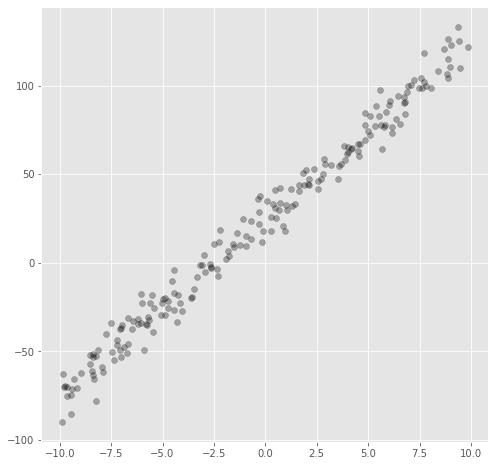

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.animation as animation
from scipy import stats 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets.samples_generator import make_regression 
# from google.colab import files

# uploaded = files.upload()

plt.style.use(['ggplot'])

path = "assignment_03_data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]

X= x_data

y = []

for i in range(200):
  line = []
  line.append(y_data[i])
  y.append(line)

plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, alpha=0.3, color = "black")
plt.show()

# **2. linear regression result [3pt]**

* plot a set of points {(x(i),y(i))}\{ (x^{(i)}, y^{(i)}) \}{(x(i),y(i))} that are loaded from 'data.csv' file (in black color)
* plot a straight line obtained by the optimal linear regression based on the given set of points (in red color)
* the estimated straight line (linear function) is superimposed on the set of points

In [0]:
X_b = np.c_[np.ones((200,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [0]:
X_new = np.array([[-100],[100]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)

(-10.0, 10.0, -100.0, 100.0)

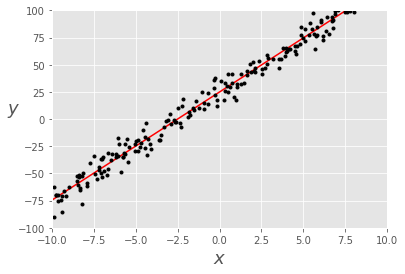

In [7]:
plt.plot(X_new,y_predict,'r-')
plt.plot(x_data,y_data,'b.', color = 'black')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-10,10,-100,100])

In [0]:
#cost 함수의 수학적 정의
def  cal_cost(theta,X,y):
    m = len(y)
    
    predictions = X.dot(theta)
    cost = np.sum((1/2*m) * np.square(predictions-y))
    return cost

In [0]:
#theta 수학적 정의를 통해 gradient_descent 정의
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history

In [10]:
#learning rate 0.01로 초기화
lr =0.01
n_iter = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]

theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)
print(theta)

[[24.90624459]
 [ 9.93461785]]


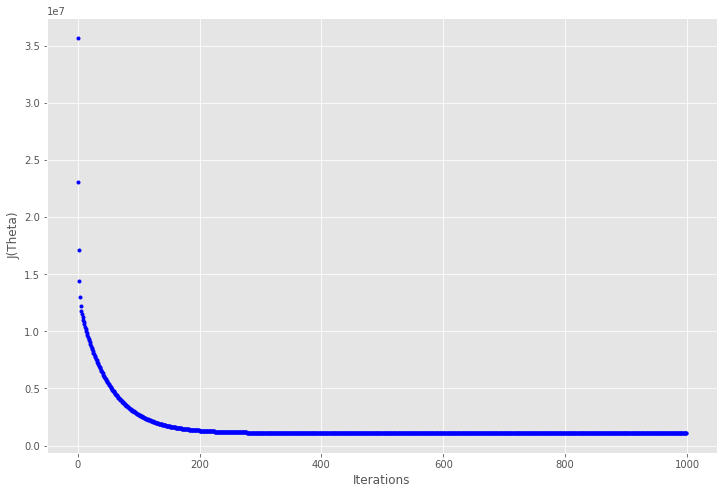

In [11]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

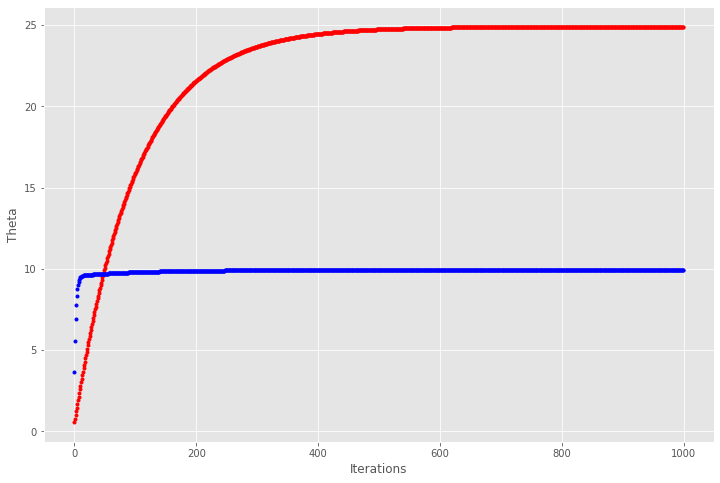

In [12]:
fig,ax = plt.subplots(figsize=(12,8))

theta0_history = []
theta1_history = []

for it in range(n_iter):
  theta0_history.append(theta_history[it][0])
  theta1_history.append(theta_history[it][1])

ax.set_ylabel('Theta')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),theta0_history,'b.', color = 'red')
_=ax.plot(range(n_iter),theta1_history,'b.', color = 'blue')


In [0]:
# fig,ax = plt.subplots(figsize=(12,8))

# theta0_history = []
# theta1_history = []

# for it in range(n_iter):
#   theta0_history.append(theta_history[it][0])
#   theta1_history.append(theta_history[it][1])

# ax.set_ylabel('Theta')
# ax.set_xlabel('Iterations')

# n_iter = 100
# x_history = np.zeros((n_iter,n_iter))
# y_history = np.zeros((n_iter,n_iter))

# for it in range(n_iter):
#   for it2 in range(n_iter):
#     x_history[it][it2] = theta0_history[it]
#     y_history[it][it2] = theta1_history[it]
#     _=ax.plot(theta0_history[it],theta1_history[it2],'b.', color = 'blue')

# # objection fuction의 수학적 정의
# def  cal_objection(theta0, theta1,X,y):
#     m = len(y)

#     objection = (1/2*m) * np.sum(np.square(theta0 + theta1*X -y))
#     return objection

In [0]:
# mpl.rcParams['legend.fontsize'] = 10

# fig = plt.figure()
# ax = fig.gca(projection='3d')

# z_history = np.zeros((n_iter,n_iter))

# for it in range(n_iter):
#   for it2 in range(n_iter):
#         z_history[it][it2] = cal_objection(theta0_history[it], theta1_history[it2],X,y)
#         # ax.plot(x_history[it][it2], y_history[it][it2], z_history[it][it2], label='parametric curve')
#         # ax.legend()

# ax.plot(x_history, y_history, z_history, label='parametric curve')
# ax.legend()

# plt.show()

In [0]:
# fig = plt.figure()
# ax = plt.axes(projection='3d')

# ax = plt.axes(projection='3d')

# def f(x, y):
#     return np.sin(np.sqrt(x ** 2 + y ** 2))

# x = np.linspace(-6, 6, 30)
# y = np.linspace(-6, 6, 30)

# X, Y = np.meshgrid(x, y)
# Z = f(X, Y)

# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.contour3D(X, Y, Z, 50, cmap='binary')
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z');

# ax = plt.axes(projection='3d')
# ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
#                 cmap='viridis', edgecolor='none')
# ax.set_title('surface');

# **3. Plot the energy surface [4pt]**

* plot the energy surface (θ0,θ1,J(θ0,θ1)(\theta_0, \theta_1, J(\theta_0, \theta_1)(θ0​,θ1​,J(θ0​,θ1​) with the range of variables θ0=[−30:0.1:30]\theta_0 = [-30 : 0.1 : 30]θ0​=[−30:0.1:30] and θ1=[−30:0.1:30]\theta_1 = [-30 : 0.1 : 30]θ1​=[−30:0.1:30]

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


30.96820299877143
[24111.03151454 24003.1719577  23939.7568453  23920.78617734
 23946.25995383 24016.17817476 24130.54084014 24289.34794996
 24492.59950423 24740.29550294 16935.96277167 16787.41432327
 16683.31031932 16623.65075981 16608.43564474 16637.66497412
 16711.33874794 16829.45696621 16992.01962892 17199.02673607
 11130.55430917 10941.31696922 10796.52407371 10696.17562264
 10640.27161602 10628.81205384 10661.79693611 10739.22626282
 10861.10003397 11027.41824957  6694.80612705  6464.87989554
  6279.39810847  6138.36076585  6041.76786767  5989.61941394
  5981.91540465  6018.6558398   6099.8407194   6225.47004345
  3628.71822529  3358.10310222  3131.9324236   2950.20618942
  2812.92439969  2720.0870544   2671.69415356  2667.74569716
  2708.2416852   2793.18211769  1932.2906039   1620.98658928
  1354.1270191   1131.71189337   953.74121208   820.21497523
   731.13318283   686.49583488   686.30293137   730.5544723
  1605.52326288  1253.53035671   945.98189497   682.87787768
   464.

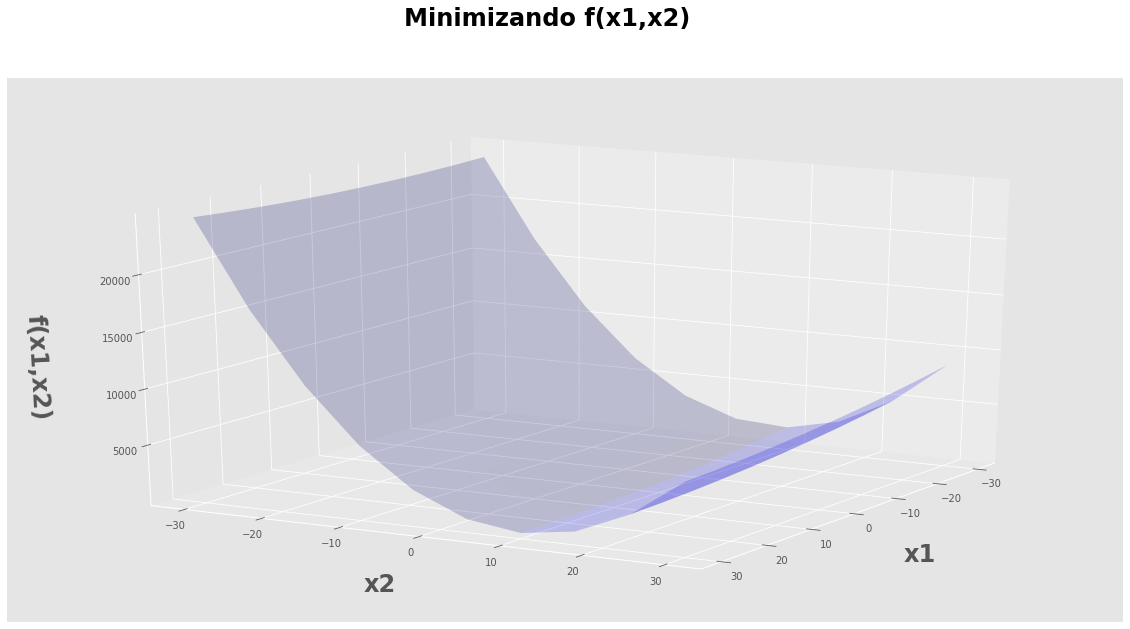

In [16]:
# x, y = make_regression(n_samples = 100, 
#                        n_features=1, 
#                        n_informative=1, 
#                        noise=20,
#                        random_state=2017)


# x = x.flatten()

x = x_data
y = y_data[0:100]

x = x.flatten()
x = x[0:100]

def gradient_descent(x, y, theta_init, step=0.001, maxsteps=0, precision=0.001, ):
    costs = []
    m = y.size # number of data points
    theta = theta_init
    history = [] # to store all thetas
    preds = []
    counter = 0
    oldcost = 0
    pred = np.dot(x, theta)
    error = pred - y 
    currentcost = np.sum(error ** 2) / (2 * m)
    preds.append(pred)
    costs.append(currentcost)
    history.append(theta)
    counter+=1
    while abs(currentcost - oldcost) > precision:
        oldcost=currentcost
        gradient = x.T.dot(error)/m 
        theta = theta - step * gradient  # update
        history.append(theta)
        
        pred = np.dot(x, theta)
        error = pred - y 
        currentcost = np.sum(error ** 2) / (2 * m)
        costs.append(currentcost)
        
        if counter % 25 == 0: preds.append(pred)
        counter+=1
        if maxsteps:
            if counter == maxsteps:
                break
        
    return history, costs, preds, counter

xaug = np.c_[np.ones(x.shape[0]), x]
theta_i = [-15, 40] + np.random.rand(2)
# theta_i = -30
history, cost, preds, iters = gradient_descent(xaug, y, theta_i, step=0.1)

theta[0] = theta0_history[0]
theta[1] = theta1_history[0]
history = theta_history
# print("Gradient Descent: {:.2f}, {:.2f} {:d}".format(theta[0], theta[1], iters))
# print("Least Squares: {:.2f}, {:.2f}".format(intercept, slope))

cost = []
history = []

for i in range(iters):
  cost.append(cost_history[i])
  history.append(theta_history[i])

theta = history[-1]

from mpl_toolkits.mplot3d import Axes3D

def error(X, Y, THETA):
    return np.sum((X.dot(THETA) - Y)**2)/(2*Y.size)

ms = np.linspace(-30 , 30, 10)
bs = np.linspace(-30 , 30, 10)

# ms = np.linspace(-30 , 30, 5)
# bs = np.linspace(-30 , 30, 5)

M, B = np.meshgrid(ms, bs)

print(error(xaug, y, theta))

zs = np.array([error(xaug, y, theta) 
               for theta in zip(np.ravel(M), np.ravel(B))])
print(zs)
Z = zs.reshape(M.shape)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
#ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)


ax.set_xlabel('x1', labelpad=30, fontsize=24, fontweight='bold')
ax.set_ylabel('x2', labelpad=30, fontsize=24, fontweight='bold')
ax.set_zlabel('f(x1,x2)', labelpad=30, fontsize=24, fontweight='bold')
ax.view_init(elev=20., azim=30)

fig.suptitle("Minimizando f(x1,x2)", fontsize=24, fontweight='bold')
plt.savefig("Minimization_image.png")

# **4. Plot the gradient descent path on the energy surface [5pt]**

* plot the energy surface (θ0,θ1,J(θ0,θ1)(\theta_0, \theta_1, J(\theta_0, \theta_1)(θ0​,θ1​,J(θ0​,θ1​) with the range of variables θ0=[−30:0.1:30]\theta_0 = [-30 : 0.1 : 30]θ0​=[−30:0.1:30] and θ1=[−30:0.1:30]\theta_1 = [-30 : 0.1 : 30]θ1​=[−30:0.1:30]

* plot the energy value with the updated variables θ0(t)\theta_0^{(t)}θ0(t)​ and θ1(t)\theta_1^{(t)}θ1(t)​ at each gradient descent step on the energy surface
* the initial condition is used by θ0(0)=−30\theta_0^{(0)} = -30θ0(0)​=−30 and θ1(0)=−30\theta_1^{(0)} = -30θ1(0)​=−30

* the gradient descent is performed until the convergence is achieved
* the gradient descent path is superimposed on the energy surface

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


[35715940.60585883 23036767.99239072 17162476.35200177 14377229.5067118
 12995520.90706982 12252777.99769643 11802153.71190584 11486277.14119425
 11233722.3723281  11012047.98220205 10806496.3014818  10610331.64039499
 10420457.80778634 10235430.25428683 10054554.3884373   9877476.56808636
  9703998.56366342  9533993.38590362  9367367.09156353  9204041.44449078
  9043946.03671633  8887014.70077916  8733183.86877672  8582391.8146957
  8434578.29765203  8289684.38723687  8147652.37171726  8008425.70406703
  7871948.96540056  7738167.83653904  7607029.07349955  7478480.48499285
  7352470.91105708  7228950.20242732  7107869.20045471  6989179.71748688
  6872834.5176651   6758787.298114    6646992.67050884  6537406.1430096
  6429984.10255314  6324683.79749561  6221463.32059807  6120281.59234817
  6021098.34461137  5923874.10460506  5828570.17918926  5735148.63946757
  5643572.3056923   5553804.73246771  5465810.19424557  5379553.67110713
  5295000.83482599  5212118.03520616  5130872.28669007

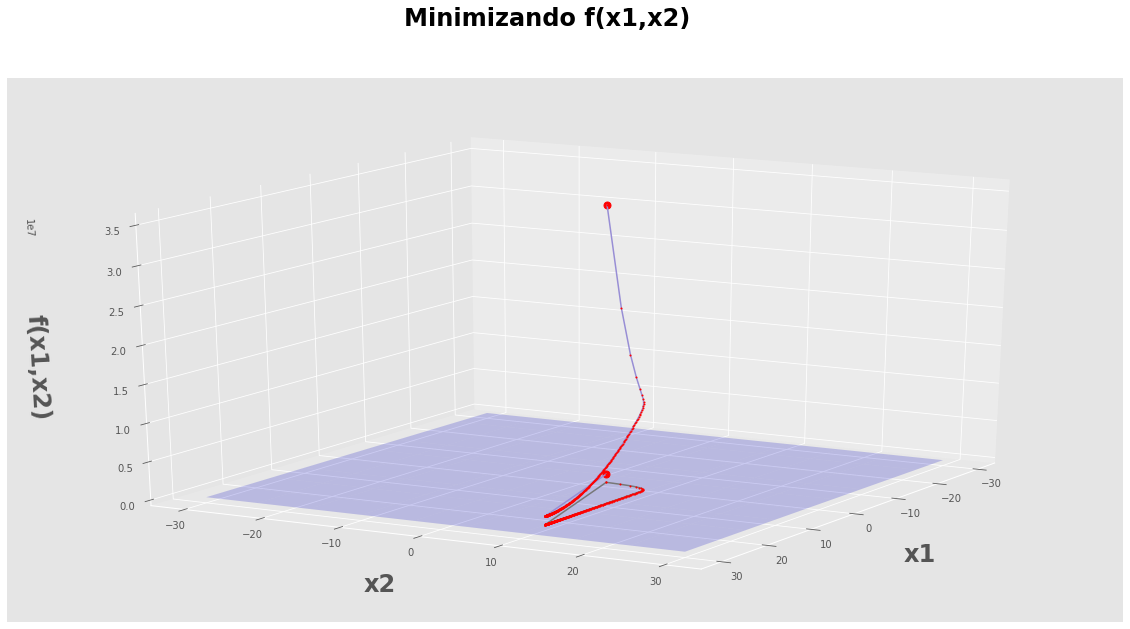

In [17]:
# x, y = make_regression(n_samples = 100, 
#                        n_features=1, 
#                        n_informative=1, 
#                        noise=20,
#                        random_state=2017)


# x = x.flatten()

x = x_data
y = y_data[0:100]

x = x.flatten()
x = x[0:100]

def gradient_descent(x, y, theta_init, step=0.001, maxsteps=0, precision=0.001, ):
    costs = []
    m = y.size # number of data points
    theta = theta_init
    history = [] # to store all thetas
    preds = []
    counter = 0
    oldcost = 0
    pred = np.dot(x, theta)
    error = pred - y 
    currentcost = np.sum(error ** 2) / (2 * m)
    preds.append(pred)
    costs.append(currentcost)
    history.append(theta)
    counter+=1
    while abs(currentcost - oldcost) > precision:
        oldcost=currentcost
        gradient = x.T.dot(error)/m 
        theta = theta - step * gradient  # update
        history.append(theta)
        
        pred = np.dot(x, theta)
        error = pred - y 
        currentcost = np.sum(error ** 2) / (2 * m)
        costs.append(currentcost)
        
        if counter % 25 == 0: preds.append(pred)
        counter+=1
        if maxsteps:
            if counter == maxsteps:
                break
        
    return history, costs, preds, counter

xaug = np.c_[np.ones(x.shape[0]), x]
theta_i = [-15, 40] + np.random.rand(2)
# theta_i = -30
history, cost, preds, iters = gradient_descent(xaug, y, theta_i, step=0.1)

theta[0] = theta0_history[0]
theta[1] = theta1_history[0]
history = theta_history
# print("Gradient Descent: {:.2f}, {:.2f} {:d}".format(theta[0], theta[1], iters))
# print("Least Squares: {:.2f}, {:.2f}".format(intercept, slope))

cost = []
history = []
print(cost_history)

for i in range(iters):
  cost.append(cost_history[i])
  history.append(theta_history[i])

theta = history[-1]

from mpl_toolkits.mplot3d import Axes3D

def error(X, Y, THETA):
    return np.sum((X.dot(THETA) - Y)**2)/(2*Y.size)

ms = np.linspace(-30 , 30, 10)
bs = np.linspace(-30 , 30, 10)

# ms = np.linspace(-30 , 30, 5)
# bs = np.linspace(-30 , 30, 5)

M, B = np.meshgrid(ms, bs)

zs = np.array([error(xaug, y, history[0]) 
               for theta in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
#ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)

ax.set_xlabel('x1', labelpad=30, fontsize=24, fontweight='bold')
ax.set_ylabel('x2', labelpad=30, fontsize=24, fontweight='bold')
ax.set_zlabel('f(x1,x2)', labelpad=30, fontsize=24, fontweight='bold')
ax.view_init(elev=20., azim=30)

ax.plot([theta[0]], [theta[1]], [cost[-1]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)
ax.plot([history[0][0]], [history[0][1]], [cost[0]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)
print(cost)

ax.plot([t[0] for t in history], [t[1] for t in history], cost , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2)
ax.plot([t[0] for t in history], [t[1] for t in history], 0 , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2)


fig.suptitle("Minimizando f(x1,x2)", fontsize=24, fontweight='bold')
plt.savefig("Minimization_image.png")